# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")


In [ ]:

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier

 **importing Dataset**

In [ ]:
crop=pd.read_csv('/content/Crop(Distric level).csv')

# **Crop Basic Info**

In [ ]:
# Assuming the 'crop' variable is expected to hold a DataFrame:
# Re-read the CSV file into the 'crop' variable to restore the DataFrame:
crop = pd.read_csv('/content/Crop(Distric level).csv')
crop.head()  # Change 'Crop' to 'crop'

,N,P,K,temperature,humidity,ph,rainfall,label,district
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,ryk
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,bahawalnagar
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,bwp
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,rajanpur
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,digikhan


In [ ]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label,district
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,cotton,khanewal
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,cotton,vihari
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,cotton,muzafargarh
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,cotton,layyah
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,cotton,d.g.khan


In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
 8   district     2200 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 154.8+ KB


In [ ]:
crop.size

19800

In [ ]:
crop.shape

(2200, 9)

In [ ]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'district'],
      dtype='object')

In [ ]:
crop['label'].unique()

array(['rice', 'maize', 'pulses', 'millets', 'sugarcane', 'mungbean',
       'blackgram', 'lentil', 'wheat', 'banana', 'mango', 'grapes',
       'cotton'], dtype=object)

In [ ]:
crop['label'].value_counts()

,count
label,
maize,300
sugarcane,300
wheat,300
cotton,300
rice,200
pulses,100
millets,100
mungbean,100
blackgram,100


In [ ]:
crop.duplicated().sum()

0

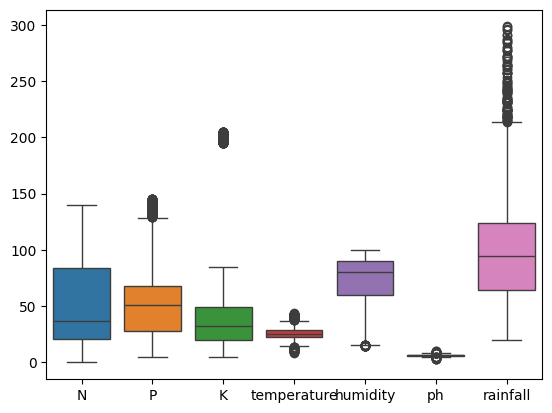

In [ ]:
sns.boxplot(data=crop)
plt.show()

# **Exploratory Data Analysis (EDA)**

In [ ]:
print(crop.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


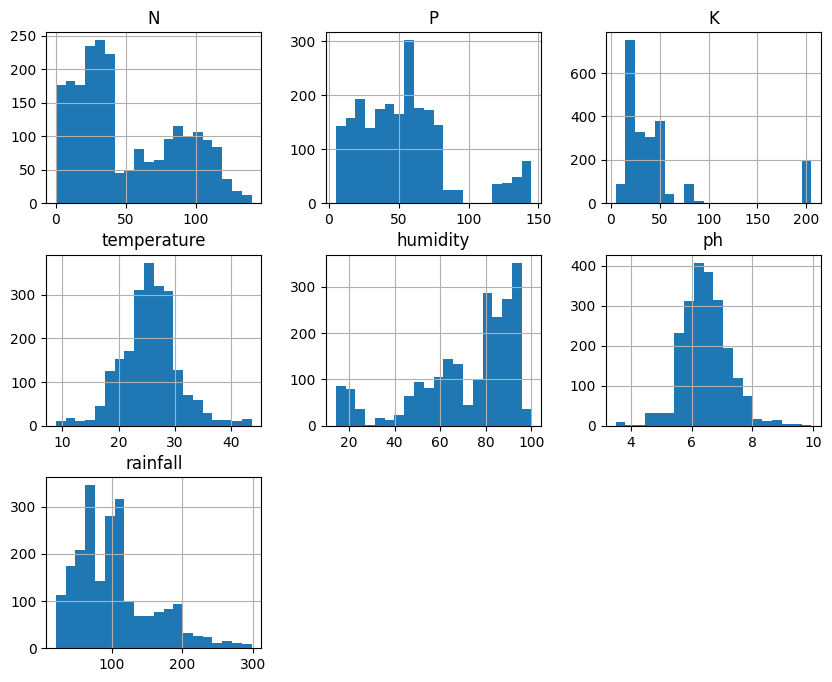

In [ ]:
# Plot feature distributions
crop.hist(figsize=(10, 8), bins=20)
plt.show()

**Correlation**

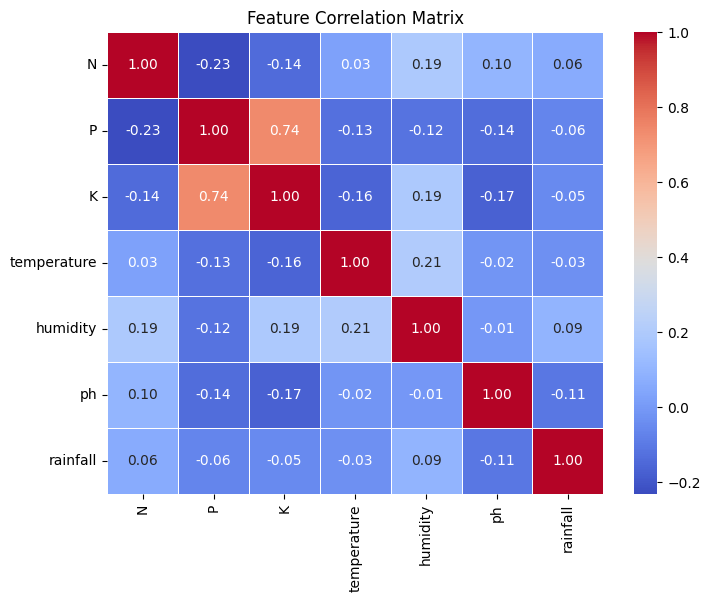

In [ ]:
# Correlation heatmap
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crop.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f") # Select only numeric features for correlation
plt.title("Feature Correlation Matrix")
plt.show()

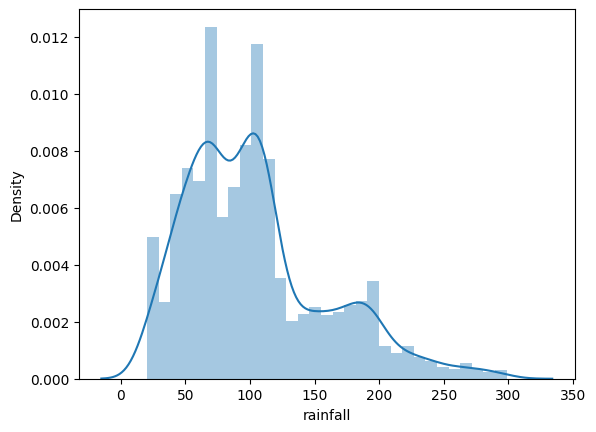

In [ ]:
sns.distplot(crop['rainfall'])
plt.show()

# **Handling Missing Values & Feature Selection**

In [ ]:
# Select Features and Target
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'district']
X = crop[features]
y = crop['label']

# Handle missing values using mean imputation
numeric_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
imputer = SimpleImputer(strategy='mean')
X[numeric_features] = imputer.fit_transform(X[numeric_features])




# **Encoding**

In [ ]:
# Encode 'label' (Target Variable)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Save the label encoder for predictions
pickle.dump(label_encoder, open("label_encoder.pkl", "wb"))

# Encode 'district' column
district_encoder = LabelEncoder()
X['district'] = district_encoder.fit_transform(X['district'])

# Save the district encoder for future predictions
pickle.dump(district_encoder, open("district_encoder.pkl", "wb"))


# **Splitting Data & scale**

In [ ]:
# Train-Test Split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler
pickle.dump(scaler, open("scaler.pkl", "wb"))



In [ ]:
X.shape

(2200, 8)

In [ ]:
y.shape

(2200,)

In [ ]:
print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])

Training Samples: 1760
Testing Samples: 440


In [ ]:
print("Training Samples:", X_train.shape)
print("Testing Samples:", X_test.shape)

Training Samples: (1760, 8)
Testing Samples: (440, 8)


# **Training All Models**

In [ ]:
# Dictionary to store accuracies
acc = {}
models = {}

# Decision Tree
dt = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=2)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
acc['Decision Tree'] = accuracy_score(y_test, y_pred_dt)
models['Decision Tree'] = dt
pickle.dump(dt, open("decision_tree.pkl", "wb"))

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)
acc['Naive Bayes'] = accuracy_score(y_test, y_pred_nb)
models['Naive Bayes'] = nb
pickle.dump(nb, open("naive_bayes.pkl", "wb"))

# Logistic Regression
lr = LogisticRegression(random_state=2, max_iter=200)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
acc['Logistic Regression'] = accuracy_score(y_test, y_pred_lr)
models['Logistic Regression'] = lr
pickle.dump(lr, open("logistic_regression.pkl", "wb"))

# Random Forest
rf = RandomForestClassifier(n_estimators=20, random_state=0)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
acc['Random Forest'] = accuracy_score(y_test, y_pred_rf)
models['Random Forest'] = rf
pickle.dump(rf, open("random_forest.pkl", "wb"))

# Print Accuracy of Each Model
for model, accuracy in acc.items():
    print(f"{model} Accuracy: {accuracy:.4f}")


Decision Tree Accuracy: 0.9364
Naive Bayes Accuracy: 0.8909
Logistic Regression Accuracy: 0.7659
Random Forest Accuracy: 0.9909


# **Plot Accuracy Comparison**

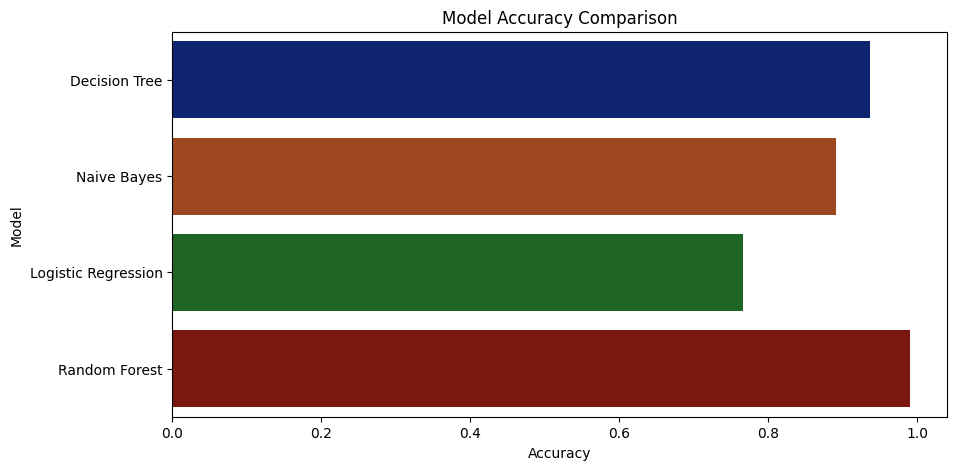

In [ ]:
# Accuracy Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=list(acc.values()), y=list(acc.keys()), palette="dark")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.title("Model Accuracy Comparison")
plt.show()


In [ ]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

R --> Decision Tree
a --> Naive Bayes
n --> Logistic Regression
d --> Random Forest


# **Predictive System**

In [ ]:
# Load Models and Encoders
rf = pickle.load(open("random_forest.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))
district_encoder = pickle.load(open("district_encoder.pkl", "rb"))
label_encoder = pickle.load(open("label_encoder.pkl", "rb"))

# Function to Make Predictions
def recommend_crop(N, P, K, temperature, humidity, ph, rainfall, district):
    try:
        # Convert District to Encoded Form
        district_encoded = district_encoder.transform([district])[0]

        # Prepare Input Data
        input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall, district_encoded]])

        # Scale the Input Data
        input_data_scaled = scaler.transform(input_data)

        # Predict Crop
        predicted_label = rf.predict(input_data_scaled)[0]

        # Decode the Crop Name
        crop_name = label_encoder.inverse_transform([predicted_label])[0]

        return f"Recommended Crop: {crop_name}"

    except Exception as e:
        return f"Error: {str(e)}"

# Example Usage
print(recommend_crop(104,18,30,23.60,60.39	,6.7,140.9,"d.g.khan"))


Recommended Crop: cotton


In [ ]:
test_inputs = [
    [80, 40, 40, 25, 80, 6.5, 200, 1],  # Example 1
    [60, 30, 35, 18, 70, 5.8, 150, 2],  # Example 2
    [90, 50, 45, 28, 90, 7.0, 250, 3]   # Example 3
]

# Convert test inputs to NumPy array
test_inputs = np.array(test_inputs)

# Scale inputs
test_inputs_scaled = scaler.transform(test_inputs)

# Make predictions
predictions = rf.predict(test_inputs_scaled)

# Convert back to crop names
predicted_crops = label_encoder.inverse_transform(predictions)

print("Predicted Crops:", predicted_crops)


Predicted Crops: ['sugarcane' 'cotton' 'rice']
